# Random Forest Classifier

**Anushka Prativadhi**

---
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>
<br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.


In [1]:
# Standard imports for CDS 411 projects
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Place additional imports below this line
from IPython.display import display, HTML
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import export_graphviz
#to surpress the scikit learn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
# One-time install and activation of improved PDF
# export template
import template_install

## Analysis of the problem

The current scale used by to measure the severity of a tropical cyclone or a hurricane that is used by the National Hurricane Center(NHC) is called the *Saffir-Simpson Hurricane Wind Scale*. It was developed in the early 1970's by Herbert Saffir and is strictly a wind scale.[3] The scale categorizes the severity of a hurricane on a scale of 1 to 5 with 1 meaning minor damage and 5 being life threatening. The post-storm analysis conducted by the National Hurricane Center (NHC) contains each tropical cyclone in the Atlantic basis which comprises of the North Atlantic Ocean, the Gulf of Mexico, and the Caribbean Sea and the North Pacific Ocean. The dataset consists of snapshots of a given hurricane from 1851-2014 over intervals of time during its entire lifespan. The dataset does not have a prelabeled Category Column. The purpose of this project is to build a classification model that accurately categorizes the hurricanes strength and to find other variables that may play a role in determining the severity of a hurricane.

## Model design and solution

The file named `atlantic.csv` can be downloaded from https://www.kaggle.com/noaa/hurricane-database.

Once downloaded, the `pandas` library is used to read the data and to preprocess before classification. Before making any changes, we look at the raw dataset.

In [2]:
read_atlantic = pd.read_csv("atlantic.csv")
read_atlantic.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [3]:
read_atlantic.shape

(49105, 22)

There are a total of 49105 rows and 22 columns in this dataframe. The location and behavior of a given hurricane or tropical storm is stored in multiple rows. The rows with missing values are given a value of -999 as a placeholder. The first two columns consist of the Name and ID of a given hurricane. There other rows are as follows:

1. **Date** - Stored in the format YYYYMMDD, it is the date corresponding to the occurrence of the hurricane or tropical storm.[2]

2. **Time** - The time (hours) in UTC (Universal Time Coordinate). Each row captures the behavior of the hurricane at a given time interval. [2]

3. **Event** - `C` means that the tropical cyclone approaches the coast but does not make landfall, `L` indicates landfall, `I` indicates peak intensity for both pressure and wind, `G` indicates the genesis or beginning of the tropical cyclone, `P` indicates a minimum central pressure, a row marked with `R` provides with additional detail on the intenstiy during rapid changes, `S` indicates a change in the status of the system, a row marked with `T` provides additional detail on the position of the cyclone, and `W` indicates the row containing the maximum sustained wind speed of the cyclone. [2]

4. **Status** - A `TD` indicates a tropical depression (< 34 knots), a `TS` indicates a tropical storm (34-63 knots), `HU` indicates a hurricane ( > 64 knots), `EX` indicates a Extratropical cyclone, `SD` indicates a subtropical depression ( < 34 knots), `SS` indicates a subtropical storm ( > 34 knots), `LO` indicates something that can neither be characterized as a tropical cyclone, a subtropical cyclone, or an extratropical cyclone, `WV` indicates a tropical wave of any intensity, `DB` indicates a disturbance. [2]

5. **Latitude** - The Latitude of the tropical cyclone at the given time.[2]

6. **Longitude** - The longitude of the tropical cyclone at the given time. [2]

7. **Maximum Wind** - It is defined as the maximum 1-min average wind associated with the tropical cyclone at an elevation of 10 m with an unobstructed exposure. It is measured in knots. [2]

8. **Minimum Pressure** - The minimum pressure of the tropical cyclone at a given time measured in millibars. [2]

9. **Low Wind NE** - Maximum extent of 34 knots wind radii in the northeastern quadrant (in nautical miles)[2]

10. **Low Wind SE** - Maximum extent of 34 knots wind radii in the southeastern quadrant (in nautical miles)[2]

11. **Low Wind SW** - Maximum extent of 34 knots wind radii in the southwestern quadrant (in nautical miles)[2]

12. **Low Wind NW** - Maximum extent of 34 knots wind radii in the northwestern quadrant (in nautical miles)[2]

13. **Moderate Wind NE** - Maximum extent of 50 knots wind radii in the northeastern quadrant (in nautical miles)[2]

14. **Moderate Wind SE** - Maximum extent of 50 knots wind radii in the southeastern quadrant (in nautical miles)[2]

15. **Moderate Wind SW** - Maximum extent of 50 knots wind radii in the southwestern quadrant (in nautical miles)[2]

16. **Moderate Wind NW** - Maximum extent of 50 knots wind radii in the northwestern quadrant (in nautical miles)[2]

17. **High Wind NE** - Maximum extent of 64 knots wind radii in the northeastern quadrant (in nautical miles)[2]

18. **High Wind SE** - Maximum extent of 64 knots wind radii in the southeastern quadrant (in nautical miles)[2]

19. **High Wind SW** - Maximum extent of 64 knots wind radii in the southwestern quadrant (in nautical miles)[2]

20. **High Wind NW** - Maximum extent of 64 knots wind radii in the northwestern quadrant (in nautical miles)[2]

More information about these variables can be obtained from the file named `atlantic.pdf` from https://www.kaggle.com/noaa/hurricane-database.

In [4]:
#Making a copy of the original dataframe so that changes made to the copy 
#will not affect the original dataframe
atlantic = read_atlantic.copy()

<br> A new category column will now be created to aid in building the prediction model. </br>
<br> The *Saffir-Simpson Hurrican Wind Scale* ,that is used by the NHC, will be used and it computes the Category based on the maximum Sustained Winds (measured in knots). </br>
<br> As per the National Oceanic and Atmospheric Administration (NOAA) https://www.nhc.noaa.gov/aboutsshws.php, the Category classification is as follows:</br>
<br> Category 1: 64 - 82 knots </br>
<br> Category 2: 83 - 95 knots </br>
<br> Category 3: 96 - 112 knots </br>
<br> Category 4: 113 - 136 knots </br>
<br> Category 5: >137 knots </br>

This classification will be used to create the new `Category` column in the dataframe whose value depends on the `Maximum Wind` column.

In [5]:
pd.options.mode.chained_assignment = None
def add_category(df):
    df["Category"] = 0
    df.loc[(df["Maximum Wind"] >= 64) & (df["Maximum Wind"] <= 82),
             "Category"] = int(1)
    df.loc[(df["Maximum Wind"] >= 83) & (df["Maximum Wind"] <= 95),
             "Category"] = int(2)
    df.loc[(df["Maximum Wind"] >= 96) & (df["Maximum Wind"] <= 112), 
             "Category"] = int(3)
    df.loc[(df["Maximum Wind"] >= 113) & (df["Maximum Wind"] <= 136),
             "Category"] = int(4)
    df.loc[(df["Maximum Wind"] >= 136), "Category"] = int(5)
    
    return df

atlantic = add_category(atlantic)

<br> The `-999` values were used as a placeholder for missing values. The presence of these values in the dataframe, however, interfere with the model calculations and so they are replaced with a `Null` or `NaN` value. </br>
<br> There also seems to be some whitespace in the columns with a string datatype which makes it hard to query these columns. Therefore, the whitespace is removed.</br>

In [6]:
def clean_df(df):
    #Replace -999 with np.nan 
    df_filtered = df.replace(-999, np.nan)
    #Removing whitespace
    df_filtered["Name"] = df_filtered["Name"].str.strip()
    df_filtered["Event"] = df_filtered["Event"].str.strip()
    df_filtered["Status"] = df_filtered["Status"].str.strip()
    
    return df_filtered

atlantic_filtered = clean_df(atlantic)
atlantic_filtered.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Category
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


The new column "Category" is added to the dataframe and is true to the Saffi Hurricane Wind Scale. The -999 values have been replaced with Null values for easier computation, whitespace was removed from the columns with datatype string.

It was hypothesized that the total duration or lifetime of a tropical cyclone may affect its Category because Category essentially is a variable that accounts for the strength of a tropical cyclone. There are two time related columns, one being `Date` and the other being `Time`. The goal is to compute the total lifetime of a given cyclone in hours. In order to do that the `Date` and `Time` columns are combined and the dataset is grouped by the Cyclone `ID`.

In [7]:
def date_time(df_filtered):
    #Converting Time and Date columns to strings
    df_filtered["Date"] = df_filtered["Date"].astype(str)
    df_filtered["Time"] = df_filtered["Time"].astype(str)
    df_filtered["Time"] = df_filtered["Time"].str.zfill(4)
    df_filtered.set_index("ID")
    #combining the Date and Time column
    df_filtered["DateTime"] = df_filtered["Date"] + df_filtered["Time"]
    #changing the datatype of this column to pandas Datetime
    df_filtered["DateTime"] = pd.to_datetime(df_filtered["DateTime"], 
                                             format = "%Y%m%d%H%M")
    
    return df_filtered

atlantic_filtered = date_time(atlantic_filtered)
atlantic_filtered.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Category,DateTime
0,AL011851,UNNAMED,18510625,0000,,HU,28.0N,94.8W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1851-06-25 00:00:00
1,AL011851,UNNAMED,18510625,0600,,HU,28.0N,95.4W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1851-06-25 06:00:00
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1851-06-25 12:00:00
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1851-06-25 18:00:00
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1851-06-25 21:00:00


After grouping the columns together, the difference in the `DateTime` between the last row and the first row of a hurricane is calculated.This difference is stored in a variable called `duration` and the `Lifetime` of a hurricane is then computed in hours.

In [8]:
def lifetime_hours(df_filtered):    
    #group hurricanes by ID
    hurricanes_grouped = df_filtered[["ID","DateTime"]].groupby(["ID"])
    duration = hurricanes_grouped.last() - hurricanes_grouped.first()
    duration = duration.reset_index()
    duration.columns = ["ID", "Lifetime"]
    #Converting duration from days to hours
    duration["Lifetime_hours"] = duration["Lifetime"] / np.timedelta64(1, "h")
    #setting ID as index to join this with the original df
    
    return duration

duration = lifetime_hours(atlantic_filtered)
duration.set_index("ID")
duration.head()

,ID,Lifetime,Lifetime_hours
0,AL011851,3 days 00:00:00,72.0
1,AL011852,11 days 00:00:00,264.0
2,AL011853,0 days 00:00:00,0.0
3,AL011854,2 days 12:00:00,60.0
4,AL011855,0 days 00:00:00,0.0


Now that the lifetime in hours has been computed, the `duration` dataframe is merged with the `atlantic_filtered` dataframe to form the `final_atlantic` dataframe.The head of the new `final_atlantic` dataframe is printed below:

In [9]:
def merge_dataframes(df_filtered, time_df):
    final_merged = pd.merge(df_filtered,time_df,on = ["ID"],how = "left")
    
    return final_merged

final_atlantic = merge_dataframes(atlantic_filtered,duration)
final_atlantic.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Category,DateTime,Lifetime,Lifetime_hours
0,AL011851,UNNAMED,18510625,0000,,HU,28.0N,94.8W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1851-06-25 00:00:00,3 days,72.0
1,AL011851,UNNAMED,18510625,0600,,HU,28.0N,95.4W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1851-06-25 06:00:00,3 days,72.0
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1851-06-25 12:00:00,3 days,72.0
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1851-06-25 18:00:00,3 days,72.0
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1851-06-25 21:00:00,3 days,72.0


The `final_atlantic` dataframe consists of all of the tropical cyclone events in the atlantic. In order to make a comparison between all tropical events and only hurricanes, a new dataframe called `hurricanes` is made which consists of only rows whose `Status` is marked as `HU` indicating Hurricane.

In [10]:
hurricanes = final_atlantic.loc[final_atlantic["Status"] == "HU"]
hurricanes = final_atlantic[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
                             'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 
                             'Moderate Wind NE','Moderate Wind SE', 'Moderate Wind SW', 
                             'Moderate Wind NW','High Wind NE', 'High Wind SE', 
                             'High Wind SW', 'High Wind NW','Lifetime_hours']]

To build a classification model, we used the `sci-kit learn` package. The `sci-kit learn` package does not allow for the presence of Null values for analysis so the Null values are replaced with the mean of the respective column. 

<br> Two variables called `labels` and `features` are also defined. `labels` is the prelabeled `Category` of the dataset and `features` is the variables that will be used to train and predict the labels. </br>

In [11]:
labels = final_atlantic["Category"]
features = final_atlantic.drop("Category", axis = 1)
#selecting only columns that will be useful in the classification process
features = features[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
                     'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
                     'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
                     'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW',
                     'Lifetime_hours']]
#replacing na values with the average of the column
features.fillna(features.mean(), inplace=True)
features.head()

,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Lifetime_hours
0,80,992.24425,81.865394,76.518325,48.647188,59.156393,24.641952,23.029894,15.427293,18.403141,8.110117,7.35771,5.13089,6.269211,72.0
1,80,992.24425,81.865394,76.518325,48.647188,59.156393,24.641952,23.029894,15.427293,18.403141,8.110117,7.35771,5.13089,6.269211,72.0
2,80,992.24425,81.865394,76.518325,48.647188,59.156393,24.641952,23.029894,15.427293,18.403141,8.110117,7.35771,5.13089,6.269211,72.0
3,80,992.24425,81.865394,76.518325,48.647188,59.156393,24.641952,23.029894,15.427293,18.403141,8.110117,7.35771,5.13089,6.269211,72.0
4,80,992.24425,81.865394,76.518325,48.647188,59.156393,24.641952,23.029894,15.427293,18.403141,8.110117,7.35771,5.13089,6.269211,72.0


The classification model is being built using a `Random Forest Classifier`. A `Random Forest classifier` is robust process that randomizes the feature selection process at each tree split which prevents overfitting.

In [12]:
#defining the names of the features and labels
feature_columns = ['Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
                   'Low Wind SE', 'Low Wind SW', 
                   'Low Wind NW','Moderate Wind NE','Moderate Wind SE', 
                   'Moderate Wind SW', 
                   'Moderate Wind NW','High Wind NE', 'High Wind SE', 
                   'High Wind SW', 'High Wind NW','Lifetime_hours']
labels_columns = 'Category'

In [13]:
#splitting the test into a training and a test set
x_train, x_test, y_train, y_test = train_test_split(features[feature_columns],\
                                                    labels ,\
                                                    test_size = 0.35, 
                                                    random_state = 10)

The function below will be used to build the Random Forest Classification Model

In [14]:
def model_prediction(rf, x_train, x_test, y_train, y_test, labels, feature_columns):
    """Build a Random Forest Classification Model.
    
    :param rf: Initialized RandomForestClassifier with necessary parameters
    :param x_train: The data set being used to train
    :param x_test: The data set on which the model will be tested
    :param y_train: The labels data being used to train
     :param y_test: The labels data that contains the true labels
    :param labels: The column that contains all true labels
    :param feature_columns: The features being used for modeling
    :returns: confusion matrix, accuracy and error rate, 
    classification report, important features,predicted values
    """
    rf.fit(x_train,y_train)
    predictions = rf.predict(x_test)
    actual_predicted = pd.DataFrame(predictions,columns=["Predicted"])
    actual_predicted["Actual"] = labels
    conf_matrix = pd.crosstab(y_test,predictions,rownames=["True"],
                                   colnames=["Predicted"],margins=True)
    accuracy_rate = metrics.accuracy_score(y_test, predictions)
    base_error_rate = 1 - accuracy_rate
    rf_report = metrics.classification_report(y_test,predictions)
    model_features = pd.DataFrame(rf.feature_importances_, 
                                          columns=["Importance of Features"], 
                                          index=feature_columns)

    return predictions, actual_predicted, accuracy_rate, base_error_rate, rf_report, model_features, conf_matrix

The base random forest model will look at the performance of the classification model with all of the variables. Based on the *feature importance*, only the important variables will then be considered.

### Base Classification Model

In [15]:
#initializing a random forest classifier
base_rf = RandomForestClassifier(n_estimators = 100, random_state = 10, max_depth=5, 
                                 oob_score=True, bootstrap=True)

In [16]:
base_model = model_prediction(rf = base_rf, x_train = x_train, x_test = x_test, 
                 y_train =y_train, y_test = y_test, labels = labels, 
                              feature_columns = feature_columns)

In [17]:
#predict testing data
predictions = base_model[0]
base_actual_predicted = base_model[1]

In [18]:
#Compute the confusion matrix to see how accurately the model is prediciting
base_conf_matrix = base_model[6]

In [19]:
base_accuracy = base_model[2]
base_error_rate = base_model[3]
print("The accuracy for a base Random Forest Classifier is:", base_accuracy, 
      "\nThe error rate for a base Random Forest Classifier is:", base_error_rate)

The accuracy for a base Random Forest Classifier is: 0.9622970850061092 
The error rate for a base Random Forest Classifier is: 0.03770291499389078


In [20]:
base_rf_report = base_model[4]

In [21]:
Initial_model_features = base_model[5]
Initial_model_features

,Importance of Features
Maximum Wind,0.693561
Minimum Pressure,0.154915
Low Wind NE,0.000953
Low Wind SE,0.001308
Low Wind SW,0.003998
Low Wind NW,0.001171
Moderate Wind NE,0.002932
Moderate Wind SE,0.006990
Moderate Wind SW,0.007534
Moderate Wind NW,0.004503


There appear to be some variables that don't contribute to the overall `Category` of the Tropical Cyclone. The variables with significantly low coefficients values are removed to see if that improves the accuracy of the model. 

### New Classification Model with important features

In [23]:
#New Random Forest with important variables
rf_new = RandomForestClassifier(n_estimators=100, random_state=10, 
                                max_depth=5, oob_score=True, bootstrap=True)
new_feature_columns = ["Maximum Wind", "Minimum Pressure", "Lifetime_hours", 
                       "High Wind SE", "High Wind NE","High Wind NW"]

In [24]:
#new training and testing set
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(
                                        features[new_feature_columns],
                                                    labels ,
                                                    test_size = 0.35, 
                                            random_state = 10)

In [25]:
new_model = model_prediction(rf = rf_new, x_train = x_train_new, x_test = x_test_new, 
                 y_train =y_train_new, y_test = y_test_new, labels = labels, 
                             feature_columns = new_feature_columns)

In [26]:
new_predictions = new_model[0]
new_actual_predicted = new_model[1]

In [27]:
new_conf_matrix = new_model[6]

In [28]:
new_accuracy = new_model[2]
new_error_rate = new_model[3]
print("The accuracy for a base Random Forest Classifier is:", new_accuracy, 
      "\nThe error rate for a base Random Forest Classifier is:", new_error_rate)

The accuracy for a base Random Forest Classifier is: 0.9710827951358585 
The error rate for a base Random Forest Classifier is: 0.02891720486414151


In [29]:
new_rf_report = new_model[4]

In [30]:
new_model = new_model[5]
new_model

,Importance of Features
Maximum Wind,0.815537
Minimum Pressure,0.117750
Lifetime_hours,0.029516
High Wind SE,0.014068
High Wind NE,0.018702
High Wind NW,0.004427


The importance of the Maximum Wind column increased very significantly. Maximum Pressure seems to be the second most important variable but its importance is significantly less than Maximum Wind.

### Classification Model with the variable `Maximum Wind` removed

In [31]:
#New Random Forest with important variables
rf_nw = RandomForestClassifier(n_estimators=100, random_state=10, 
                                max_depth=5, oob_score=True, bootstrap=True)
nw_feature_cols = ['Minimum Pressure', 'Low Wind NE','Low Wind SE', 'Low Wind SW', 
                   'Low Wind NW','Moderate Wind NE','Moderate Wind SE', 
                   'Moderate Wind SW', 
                   'Moderate Wind NW','High Wind NE', 'High Wind SE', 
                   'High Wind SW', 'High Wind NW','Lifetime_hours']

In [34]:
#new training and testing set
x_train_nw, x_test_nw, y_train_nw, y_test_nw = train_test_split(
                                        features[nw_feature_cols],
                                                    labels ,
                                                    test_size = 0.35, 
                                            random_state = 10)

In [35]:
nw_model = model_prediction(rf = rf_nw, x_train = x_train_nw, x_test = x_test_nw, 
                 y_train =y_train_nw, y_test = y_test_nw, labels = labels, 
                            feature_columns = nw_feature_cols)

In [36]:
nw_predictions = nw_model[0]
nw_actual_predicted = nw_model[1]

In [39]:
nw_conf_matrix = nw_model[6]

In [40]:
nw_accuracy = nw_model[2]
nw_error_rate = nw_model[3]
print("The accuracy for a base Random Forest Classifier is:", nw_accuracy, 
      "\nThe error rate for a base Random Forest Classifier is:", nw_error_rate)

The accuracy for a base Random Forest Classifier is: 0.7355559434456275 
The error rate for a base Random Forest Classifier is: 0.26444405655437253


In [41]:
nw_rf_report = nw_model[4]

In [42]:
nw_model = nw_model[5]
nw_model

,Importance of Features
Minimum Pressure,0.498321
Low Wind NE,0.003320
Low Wind SE,0.006308
Low Wind SW,0.005551
Low Wind NW,0.003569
Moderate Wind NE,0.019601
Moderate Wind SE,0.018154
Moderate Wind SW,0.018701
Moderate Wind NW,0.028788
High Wind NE,0.088450


### Classification Model consisting of only Hurricanes labelled as `HU`

The dataframe called `hurricanes` consists of only the rows that are classified as hurricanes. We will build a classification model with this dataframe using the same parameters as above to see if there is a difference between the two models.

In [43]:
#replacing null values with the mean of the column
hurricanes.fillna(hurricanes.mean(), inplace=True)

In [44]:
#new training and testing set
x_train_hu, x_test_hu, y_train_hu, y_test_hu = train_test_split(
                                    hurricanes[feature_columns],
                                                    labels ,
                                                    test_size = 0.35, 
                                            random_state = 10)

In [45]:
hu_model = model_prediction(rf = base_rf, x_train = x_train_hu, x_test = x_test_hu, 
                 y_train =y_train_hu, y_test = y_test_hu, labels = labels, feature_columns = feature_columns)

In [46]:
hu_predictions = hu_model[0]
hu_actual_predicted = hu_model[1]

In [47]:
hu_conf_matrix = hu_model[6]

In [48]:
hu_accuracy = hu_model[2]
hu_error_rate = hu_model[3]
print("The accuracy for a base Random Forest Classifier is:", hu_accuracy, 
      "\nThe error rate for a base Random Forest Classifier is:", hu_error_rate)

The accuracy for a base Random Forest Classifier is: 0.9622970850061092 
The error rate for a base Random Forest Classifier is: 0.03770291499389078


There appears to be no difference in the accuracy between the two models. 

## Results and Conclusion

### Hyperparameter Testing

Although a Random Forest Classifier is robust and prevents overfitting, a good way to significantly improve model performance is set the right parameters when initializing the classification model. 

In [49]:
#initializing a random forest classifier with default values
rf = RandomForestClassifier(random_state=10)

In [50]:
#new training and testing set
x_train_best, x_test_best, y_train_best, y_test_best = train_test_split(
                                    features[feature_columns],
                                                    labels ,
                                                    test_size = 0.35, 
                                            random_state = 10)

In [51]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)>

In [52]:
#number of decision trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
#number of features to be considered at each split
max_features = ['auto', 'sqrt']
#maximum depth of the trees
max_depth = [int(x) for x in np.linspace(15, 200, num = 2)]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [53]:
%%capture
#used capture to surpress output of the randomized grid search
def cross_validate(rf, random_grid, no_iter, cv, x_train, y_train):

    rf_grid_search = RandomizedSearchCV(rf, 
                                        param_distributions = random_grid, 
                                        n_iter = no_iter, 
                                        cv = cv, verbose=2, random_state=10)
    rf_grid_search = rf_grid_search.fit(x_train, y_train)
    
    return rf_grid_search

rf_grid_search = cross_validate(rf = rf, random_grid = random_grid, 
                                no_iter = 10, cv = 4, 
                                x_train = x_train_best, y_train = y_train_best)

In [54]:
rf_grid_search.best_params_

{'n_estimators': 500,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': False}

We now perform the random forest classification with the best parameters found by Random Grid Search

In [55]:
best_params = {"n_estimators": 500,
 "max_features": 'auto',
 "max_depth": 15,
 "bootstrap": False}

In [56]:
rf_best = RandomForestClassifier(n_estimators=best_params["n_estimators"], 
                                 max_features = best_params["max_features"], 
                                 max_depth = best_params["max_depth"], 
                                 bootstrap = best_params["bootstrap"])

In [57]:
best_model = model_prediction(rf = rf_best, x_train = x_train_best, 
                              x_test = x_test_best, 
                 y_train =y_train_best, y_test = y_test_best,
                              labels = labels, feature_columns = feature_columns)

In [58]:
best_predictions = best_model[0]
best_actual_predicted = best_model[1]

In [59]:
best_conf_matrix = best_model[6]

In [60]:
best_accuracy = best_model[2]
best_error_rate = best_model[3]
print("The accuracy for a base Random Forest Classifier is:", best_accuracy, 
      "\nThe error rate for a base Random Forest Classifier is:", best_error_rate)

The accuracy for a base Random Forest Classifier is: 0.9997090824460348 
The error rate for a base Random Forest Classifier is: 0.0002909175539651532


In [61]:
best_rf_report = best_model[4]

In [62]:
#Storing the performance of the model in a dictionary
performance = pd.DataFrame(
    {
        "Number of estimators" : 100,
        "Depth of Tree" : 5,
        "Accuracy" : base_accuracy,
        "Error Rate" : base_error_rate
    }, index = np.arange(1))
performance.loc[1] = [100, 5, new_accuracy, new_error_rate]
performance.loc[2] = [best_params["n_estimators"], 
                      best_params["max_depth"], 
                      best_accuracy, best_error_rate]
performance

,Number of estimators,Depth of Tree,Accuracy,Error Rate
0,100.0,5.0,0.962297,0.037703
1,100.0,5.0,0.971083,0.028917
2,500.0,15.0,0.999709,0.000291


On running the Random Grid Search Cross Validation, we obtain the parameters that will help minimize the error rate. The number of estimators go from 100 used in making the initial models to 300. The depth of the tree goes from 5 in the initial models to 15, and the error rate significantly decreases. 

#### Confusion Matrix

In [63]:
display("The base confusion matrix with all the variables:", base_conf_matrix)
display("The new confusion matrix with important variables:" ,new_conf_matrix)
display("All the variables with the best parameters from cross-validation:", 
        best_conf_matrix)

'The base confusion matrix with all the variables:'

Predicted,0,1,2,3,4,All
True,,,,,,
0,11851,0,0,0,0,11851
1,0,2958,0,0,0,2958
2,0,2,1315,0,0,1317
3,29,388,55,231,6,709
4,0,117,4,12,184,317
5,1,9,1,1,23,35
All,11881,3474,1375,244,213,17187


'The new confusion matrix with important variables:'

Predicted,0,1,2,3,4,All
True,,,,,,
0,11851,0,0,0,0,11851
1,0,2958,0,0,0,2958
2,0,0,1317,0,0,1317
3,0,0,333,376,0,709
4,0,0,103,26,188,317
5,0,0,9,1,25,35
All,11851,2958,1762,403,213,17187


'All the variables with the best parameters from cross-validation:'

Predicted,0,1,2,3,4,5,All
True,,,,,,,
0,11851,0,0,0,0,0,11851
1,0,2958,0,0,0,0,2958
2,0,0,1316,1,0,0,1317
3,0,0,0,708,1,0,709
4,0,0,0,2,315,0,317
5,0,0,0,0,1,34,35
All,11851,2958,1316,711,317,34,17187


The `base model` accurately classifies rows belonging to Categories 0 and 1. It does a decent job at classifying Categories 2 and 5 but it doesn't classify Categories 3 and 4 well.

The `model with reduced features` classifies Categories 0,1, and 2 really well. It does a better job than the base model at classifying Categories 3, 4, and 5.

The `best parameters model` classifies almost all of the Categories well. The worst Category it classifies is Category 4 and it's only off by 2. 

#### Classification Report

***Accuracy*** is not usually the best measure to determine if a classification is a good model. Therefore, the precision, recall, f1 score, and support for each of the three classification models are computed.

<br> **Precision**: It is defined as the number of times the model is correct in predicting that a row belongs to a category. [1]</br>

<br> **Recall** :It is a measure of how often are the predicted and actual category the same.[1]</br>

<br> **F1 Score** : It is defined as the mean of the precision and recall.</br>

<br> **Support** : This measures the total number of values in the dataset that fall under this category. </br>

In [64]:
print("The base classification report is:\n", base_rf_report)
print("The new classification report is:\n", new_rf_report)
print("The best parameters classification report is:\n", best_rf_report)

The base classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11851
           1       0.85      1.00      0.92      2958
           2       0.96      1.00      0.98      1317
           3       0.95      0.33      0.48       709
           4       0.86      0.58      0.69       317
           5       0.00      0.00      0.00        35

   micro avg       0.96      0.96      0.96     17187
   macro avg       0.77      0.65      0.68     17187
weighted avg       0.96      0.96      0.95     17187

The new classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11851
           1       1.00      1.00      1.00      2958
           2       0.75      1.00      0.86      1317
           3       0.93      0.53      0.68       709
           4       0.88      0.59      0.71       317
           5       0.00      0.00      0.00        35

   mic

The *precision*, *recall*, and *f1 score* remain the same for Category 0 in all three cases. The *precision* increases significantly from the base model to the new model and the new model and best parameters model have the same precision for Category 1. There is a significant decrease in the precision of Category 2 from the base model to the new model but the precision increases significantly for the best parameters model. The *recall* for Categories 3,4, and 5 is significantly low in the base model as well as the new model but they significantly increase to almost 100% in the best parameters model. Categories 3 and 4 have relatively lower values for f1 scores and Category 5 is 0. This value significantly imporves in the new classification model. 

#### Feature Importance

In [65]:
display("The coefficients of the base model are", Initial_model_features)
display("The reduced coefficients of the new model are", new_model)
display("The model without the variable Maximum Wind", nw_model)

'The coefficients of the base model are'

,Importance of Features
Maximum Wind,0.693561
Minimum Pressure,0.154915
Low Wind NE,0.000953
Low Wind SE,0.001308
Low Wind SW,0.003998
Low Wind NW,0.001171
Moderate Wind NE,0.002932
Moderate Wind SE,0.006990
Moderate Wind SW,0.007534
Moderate Wind NW,0.004503


'The reduced coefficients of the new model are'

,Importance of Features
Maximum Wind,0.815537
Minimum Pressure,0.117750
Lifetime_hours,0.029516
High Wind SE,0.014068
High Wind NE,0.018702
High Wind NW,0.004427


'The model without the variable Maximum Wind'

,Importance of Features
Minimum Pressure,0.498321
Low Wind NE,0.003320
Low Wind SE,0.006308
Low Wind SW,0.005551
Low Wind NW,0.003569
Moderate Wind NE,0.019601
Moderate Wind SE,0.018154
Moderate Wind SW,0.018701
Moderate Wind NW,0.028788
High Wind NE,0.088450


The `base model` shows us that `Maximum Wind` has the highest importance in the model followed by `Minimum Pressure`, and `Lifetime_hours`. 

The `model with reduced features` shows us that `Maximum Wind` is the most important feature, followed by `Minimum Pressure`, `Lifetime_hours`, `High Wind SE`, `High Wind NE`, and finally, `High Wind NW`.

The `model with Maximum Wind removed` was used to see if removing an important variable, which was dominating the results,would give us a better understanding of the other variables. We see that `Maximum Pressure` and `Lifetime_hours` are important features along with `High Wind NE` and `High Wind SE`. Removing the `Maximum Wind` feature, however, did not give us any new information.

#### Out of bag error

In [66]:
print("The out of bag error for the base model is:",
      base_rf.oob_score_,
      "\nThe out of bag error for the reduced features model is:", 
      rf_new.oob_score_,
      "\nThe out of bag error for the model with Maximum Wind removed is:", 
      rf_nw.oob_score_)

The out of bag error for the base model is: 0.9450466821229401 
The out of bag error for the reduced features model is: 0.9744031580926124 
The out of bag error for the model with Maximum Wind removed is: 0.7391440566451533


Based on the out of bag errors above, the `base model` misclassifies about 5% of the samples, the `reduced features model` misclassifies less than 3% of the samples and `the model without Maximum Wind` misclassifies about 26% of the samples.

#### Exploratory Data Analysis

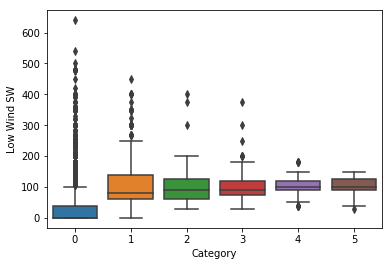

In [67]:
sns.boxplot(x = "Category", y = "Low Wind SW",data = final_atlantic);

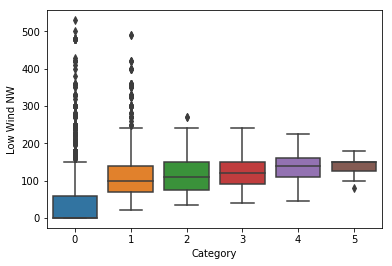

In [68]:
sns.boxplot(x = "Category", y = "Low Wind NW",data = final_atlantic);

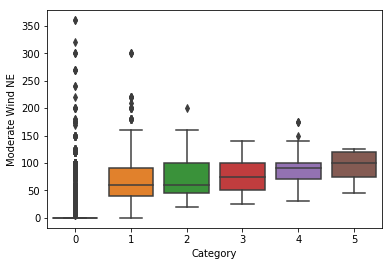

In [69]:
sns.boxplot(x = "Category", y = "Moderate Wind NE",data = final_atlantic);

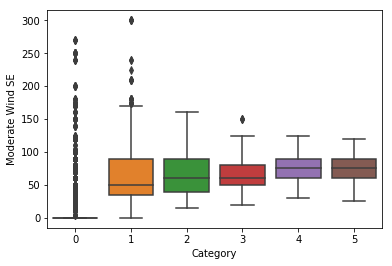

In [70]:
sns.boxplot(x = "Category", y = "Moderate Wind SE",data = final_atlantic);

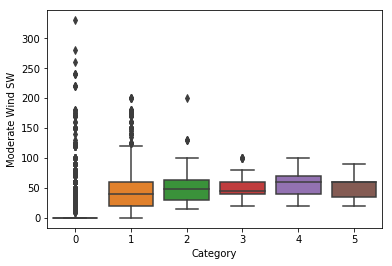

In [71]:
sns.boxplot(x = "Category", y = "Moderate Wind SW",data = final_atlantic);

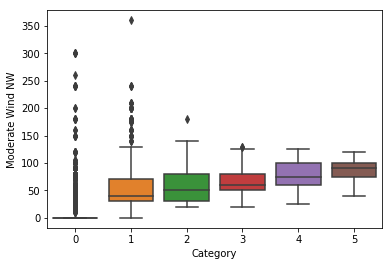

In [72]:
sns.boxplot(x = "Category", y = "Moderate Wind NW",data = final_atlantic);

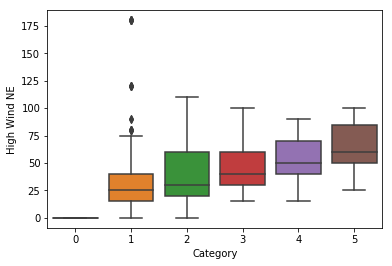

In [73]:
sns.boxplot(x = "Category", y = "High Wind NE",data = final_atlantic);

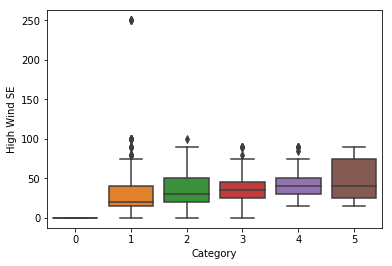

In [74]:
sns.boxplot(x = "Category", y = "High Wind SE",data = final_atlantic);

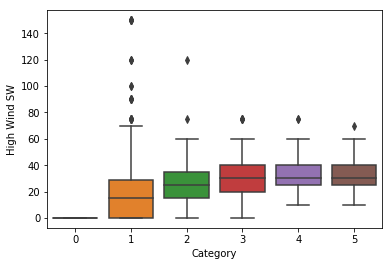

In [75]:
sns.boxplot(x = "Category", y = "High Wind SW",data = final_atlantic);

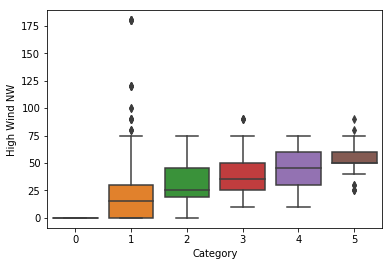

In [76]:
sns.boxplot(x = "Category", y = "High Wind NW",data = final_atlantic);

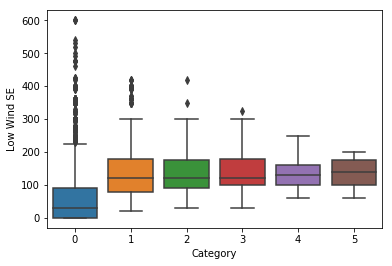

In [77]:
sns.boxplot(x = "Category", y = "Low Wind SE",data = final_atlantic);

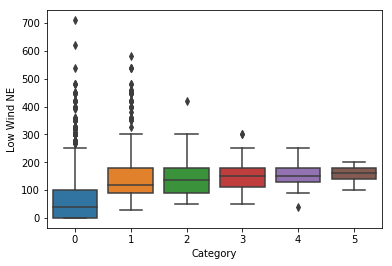

In [78]:
sns.boxplot(x = "Category", y = "Low Wind NE",data = final_atlantic);

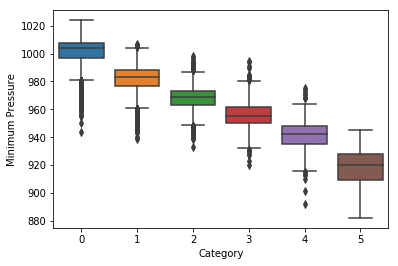

In [79]:
sns.boxplot(x = "Category", y = "Minimum Pressure",data = final_atlantic);

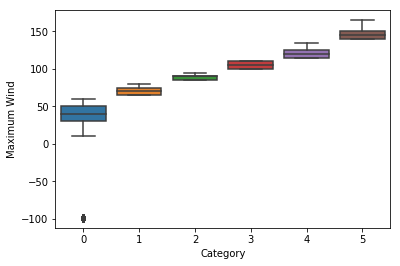

In [80]:
sns.boxplot(x = "Category", y = "Maximum Wind",data = final_atlantic);

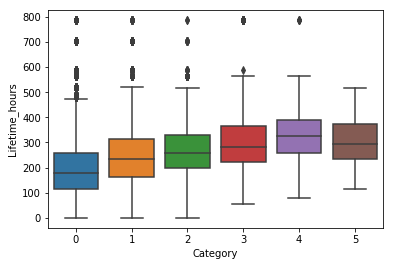

In [81]:
sns.boxplot(x = "Category", y = "Lifetime_hours", data = final_atlantic); 

In [82]:
final_atlantic.describe(exclude = [np.number])

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,DateTime
count,49105,49105,49105,49105,49105,49105,49105,49105,49105
unique,1814,288,9983,92,10,9,597,1036,38310
top,AL031899,UNNAMED,19710912,1200,,TS,28.0N,65.0W,1971-09-12 00:00:00
freq,133,26563,24,12296,48141,17804,299,181,6
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1851-06-25 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-13 12:00:00


In [83]:
final_atlantic.isna().sum()

ID                      0
Name                    0
Date                    0
Time                    0
Event                   0
Status                  0
Latitude                0
Longitude               0
Maximum Wind            0
Minimum Pressure    30669
Low Wind NE         43184
Low Wind SE         43184
Low Wind SW         43184
Low Wind NW         43184
Moderate Wind NE    43184
Moderate Wind SE    43184
Moderate Wind SW    43184
Moderate Wind NW    43184
High Wind NE        43184
High Wind SE        43184
High Wind SW        43184
High Wind NW        43184
Category                0
DateTime                0
Lifetime                0
Lifetime_hours          0
dtype: int64

In [84]:
final_atlantic.shape

(49105, 26)

When looking at the null values for each column and the shape of the dataframe, it appears that a majority of the rows for `Low Winds`, `Moderate Winds`, and `High Wind (NE, SE, SW, and NW)` are empty. This absence of values may make it harder to find the effect of these variables on the `Category` of the hurricane. It should also be noted that `Maximum Wind` does not have any null values which could explain its large effect on the `Category` of the hurricane.

<br>The above table shows us the coefficients obtained from the base model. It can be observed that `Maximum Wind` has the highest coefficient which makes sense because `Maximum Wind` was primary variable used to determine the category of the tropical cyclone. `Minimum Pressure` seems to be the second most essential variable in the classification of a tropical cyclone. `Low Wind NE` seems to be the least important variable in the classification.</br>
The second table shows us the results of tailoring the training data to contain only the variables with significantly high importance from the base model.After removing some variables, the coefficient of the `Maximum Wind` variable further increased while the coefficient of the `Minimum Pressure` variable decreased. 

The purpose of this project was to build a classification model that accurately categorizes the hurricanes strength and to find other variables that may play a role in determining the severity of a hurricane. The two main variables that were identified from this analysis were `Maximum Wind` and `Minimum Pressure`. While an accurate classification model was built, the presence of so many null values in a lot of the rows may explain why more significant indicators of the severity of a hurricane were not found. It was also identified that the `lifetime` of the hurricane could be a potential indicator of hte severity of the hurricane. While the `lifetime` of the hurricane seemed to have a slight effect on the `Category` of the hurricane, it was not very significant.

## References

[1] https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

[2] Dataset from  https://www.kaggle.com/noaa/hurricane-database

[3] https://weather.com/safety/hurricane/news/saffir-simpson-hurricane-wind-scale